In [1]:
import cv2

# Load an image
image = cv2.imread("640.png")
clone = image.copy()

# To store coordinates
drawing = False
ix, iy = -1, -1
coordinates = []

# Mouse callback function
def draw_rectangle(event, x, y, flags, param):
    global ix, iy, drawing, image, coordinates

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        coordinates = []

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            image = clone.copy()
            cv2.rectangle(image, (ix, iy), (x, y), (0, 255, 0), 2)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(image, (ix, iy), (x, y), (0, 255, 0), 2)
        coordinates = [min(ix, x), min(iy, y), max(ix, x), max(iy, y)]
        print("Box coordinates: x0={}, y0={}, x1={}, y1={}".format(*coordinates))

# Set up window and callback
cv2.namedWindow("Image")
cv2.setMouseCallback("Image", draw_rectangle)

while True:
    cv2.imshow("Image", image)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("r"):  # reset
        image = clone.copy()
    elif key == 27:  # ESC to exit
        break

cv2.destroyAllWindows()


Box coordinates: x0=405, y0=80, x1=573, y1=317


In [1]:
def draw_overlay(current_room, current_action,previous_action_overlay):

    overlay_width, overlay_height = int(600), int(400)  # Scale by 2.5

    overlay = np.ones((overlay_height, overlay_width, 3), dtype=np.uint8) * 255  # White background

    overlay = np.ones((overlay_height, overlay_width, 3), dtype=np.uint8) * 255  # White background

    # Draw house (outer rectangle)
    cv2.rectangle(overlay, (0, 0), (overlay_width, overlay_height), (0, 0, 0), 4)  # Thicker black border

    # Define room coordinates
    rooms = {
        "Kitchen": (100, 200, 100, 160),
        "Bathroom": (100, 100, 100, 100),
        "Bedroom": (200, 100, 200, 100),
        "Living Room": (400, 100, 100, 260),
    }

    actions = {
        "Fridge": (101, 270, 25, 25),
        "Laying on Bed": (270, 101, 60, 60),
        "Sink": (169, 130, 30, 40),
        "Sitting on Couch": (469, 200, 30, 80),
    }


    # Draw rooms
    for room_name, (x, y, w, h) in rooms.items():
        color = (154, 205, 50)  # Medium sea green
        if room_name == current_room:
            color = (0, 165, 255)  # Orange highlight
        cv2.rectangle(overlay, (x, y), (x + w, y + h), color, -1)  # Filled
        cv2.rectangle(overlay, (x, y), (x + w, y + h), (255, 255, 255), 1)  # Black border
        cv2.putText(overlay, room_name, (x + 5, y + h - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (120, 120, 120), 1)

    # Draw actions
    for action_name, (x, y, w, h) in actions.items():
        color = (128, 128, 128)  # Grey
        if action_name == current_action:
            color = (0, 255, 255)  # Yellow highlight
        if action_name == previous_action_overlay:
            color = (0, 120, 120)
        cv2.rectangle(overlay, (x, y), (x + w, y + h), color, -1)  # Filled
        cv2.rectangle(overlay, (x, y), (x + w, y + h), (0, 0, 0), 1, lineType=cv2.LINE_AA)

    return overlay

In [1]:
import cv2

# Load an image
image = cv2.imread("640.png")
clone = image.copy()

drawing = False
ix, iy = -1, -1
current_action = ""
actions = {}

def draw_rectangle(event, x, y, flags, param):
    global ix, iy, drawing, image, current_action

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            image[:] = clone.copy()
            cv2.rectangle(image, (ix, iy), (x, y), (0, 255, 0), 2)
            cv2.putText(image, current_action, (ix, iy - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                        0.7, (255, 0, 0), 2)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        x0, y0 = min(ix, x), min(iy, y)
        x1, y1 = max(ix, x), max(iy, y)
        w, h = x1 - x0, y1 - y0
        actions[current_action] = (x0, y0, w, h)
        cv2.rectangle(image, (x0, y0), (x1, y1), (0, 255, 0), 2)
        cv2.putText(image, current_action, (x0, y0 - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.7, (255, 0, 0), 2)
        print(f"{current_action}: ({x0}, {y0}, {w}, {h})")

# Set up window and mouse callback
cv2.namedWindow("Image")
cv2.setMouseCallback("Image", draw_rectangle)

while True:
    cv2.imshow("Image", image)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("a"):
        current_action = input("Enter action name: ")
    elif key == ord("s"):
        print("\nFinal actions dictionary:")
        print("actions = {")
        for k, v in actions.items():
            print(f'    "{k}": {v},')
        print("}")
    elif key == ord("r"):
        image = clone.copy()
        actions = {}
        print("Reset all annotations.")
    elif key == 27:  # ESC
        break

cv2.destroyAllWindows()


Moving: (415, 84, 95, 183)
Couch: (203, 279, 312, 140)
Couch: (515, 299, 0, 0)


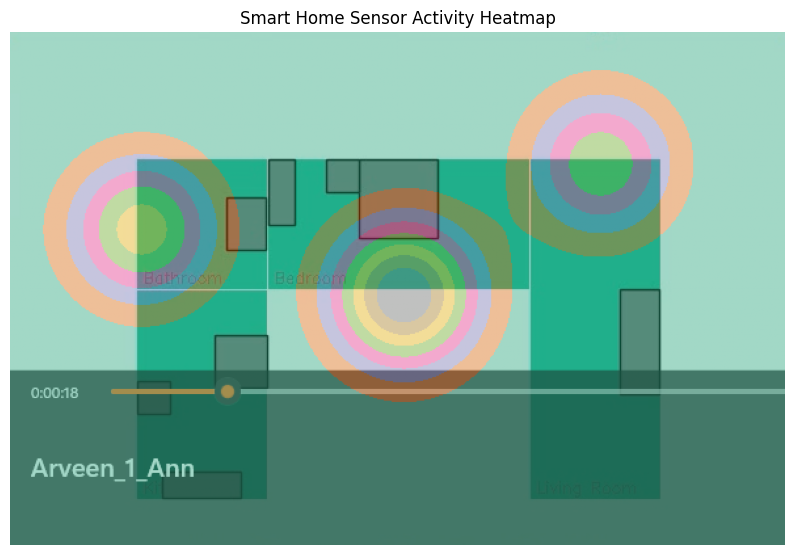

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from PIL import Image

# Load background image (your floor plan)
bg = Image.open("floorplan.png")  # Make sure image size is known
bg_width, bg_height = bg.size

# Sensor positions (x, y in pixel coordinates) and their intensities
sensor_positions = np.array([
    [100, 150],  # living room
    [300, 200],  # kitchen
    [450, 100],  # bedroom
    [250, 400]   # hallway
])
sensor_values = np.array([0.7, 1.0, 0.6, 0.9])  # e.g., activity intensity

# Create a blank heatmap the same size as the image
heatmap = np.zeros((bg_height, bg_width))

# Place sensor values on the heatmap
for (x, y), value in zip(sensor_positions, sensor_values):
    if 0 <= x < bg_width and 0 <= y < bg_height:
        heatmap[y, x] = value  # y is row, x is column (image coords)

# Smooth with Gaussian filter to spread the intensity
heatmap_blurred = gaussian_filter(heatmap, sigma=[20,50])  # Adjust sigma for spread

# Plot everything
plt.figure(figsize=(10, 8))
plt.imshow(bg)  # Background image
plt.imshow(heatmap_blurred, cmap='Dark2', alpha=0.4)  # Overlay heatmap
plt.title("Smart Home Sensor Activity Heatmap")
plt.axis('off')
plt.show()
